In [1]:
#importing module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


C:\Users\User\.conda\envs\tensor flow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#importing data from csv
data = pd.read_csv('SSR.csv')
data.head()

,H,Q,D,SSR,Sqz_label
0,150.0,0.400,6.0,0.627,N
1,200.0,0.400,6.0,0.335,N
2,52.0,15.000,13.0,2.721,N
3,280.0,0.050,3.0,0.100,Y
4,100.0,0.005,4.2,0.011,Y


In [3]:
#shape of data types
data.shape

(95, 5)

In [4]:
X = data.drop(['Sqz_label'], axis=1)
y = data.Sqz_label

In [5]:
print(X.shape)
print(y.shape)

(95, 4)
(95,)


In [6]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
y = le.fit_transform(y)
y = np.reshape(y, (-1,1))


In [8]:
#lets observe the data distribution
X.describe()

,H,Q,D,SSR
count,95.000000,95.000000,95.000000,95.000000
mean,279.120000,1.808474,7.043684,0.495126
std,194.034568,9.958730,3.123693,0.994641
min,37.000000,0.001000,2.500000,0.003000
25%,113.000000,0.010000,4.775000,0.107000
50%,217.500000,0.025000,6.000000,0.243000
75%,405.000000,0.222500,8.700000,0.385000
max,800.000000,93.500000,16.000000,8.611000


C:\Users\User\.conda\envs\tensor flow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


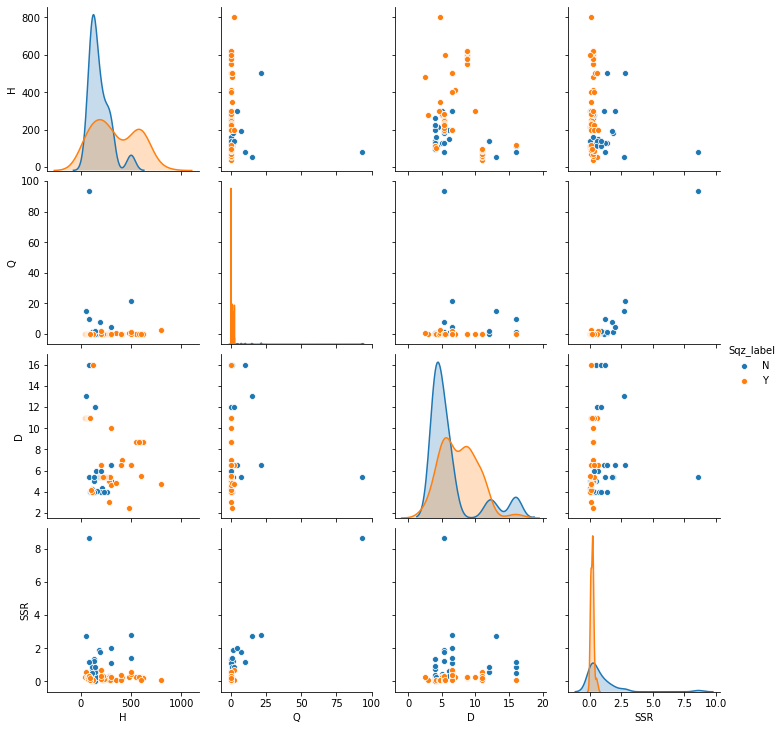

In [9]:
#plotting the corelation graph to see the data distribution
import seaborn as sns
sns.pairplot(data, hue = 'Sqz_label', size= 2.5)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#creating pipeline for no leakage
pipe = Pipeline([('scaler', StandardScaler()), ('RCLF', RandomForestClassifier())])

In [19]:
#Hyperparameter Tuning and voting classifier
# importing model classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svn_clf = SVC()

In [21]:
voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svn_clf)], 
    voting = 'hard')
voting_clf.fit(X_train, y_train)

C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [22]:
#selecting the best classifier
for clf in (log_clf, rnd_clf, svn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


LogisticRegression 0.7916666666666666
RandomForestClassifier 0.875
SVC 0.5


C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.7083333333333334


#### So the Random Forest regressor has more acccuracy score. which supports our model even more.
#### Now if we can look for hyperparameter tuning 

In [23]:
#Feature importance in classification
for name, score in zip(X, rnd_clf.feature_importances_):
    print(name +' :', score)

H : 0.16821608828059695
Q : 0.3427889222866258
D : 0.14599555709080633
SSR : 0.342999432341971


#### This kind of feature importance allows in selecting the most effective datasets. Since we have only four feature we will take all of them and proceed. Still we can see that SSR and Q value are more effective in this datasets.

In [26]:
#using the pipeline for model accuracy
pipe.fit(X_train, y_train)
y_pred1= pipe.predict(X_test)

C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[10,  2],
       [ 0, 12]], dtype=int64)

In [28]:
pipe.score(X_test, y_test)

0.9166666666666666

In [29]:
def figure(y_pred):
    plt.plot(y_test, marker = 'o', color = 'g', label = 'y_test')
    plt.plot(y_pred, marker = '^', color = 'r', label = 'y_pred')
    plt.grid()
    plt.xlabel('No Of Observation')
    plt.ylabel('Label')
    plt.legend()
    plt.title('Rock Classification')

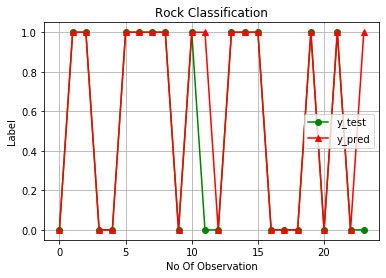

In [30]:
figure(y_pred1)

#### The model Randomforest classifer perform better with this binary classification. 
USing pipeline has increased our accuracy for 87% to 91 %, Still we should look for other better model to improve the prediction value and feature engineering is also helps in attaining that.
#### Graph also shows total of three mistakes in prediction.

In [31]:
#Grid Search CV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80,90,100,110],
    'max_features': [2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators':[100,200,300,100]
}

#ran_clf as model based

#Instantiate the grid search method
grid_search = GridSearchCV(estimator= rnd_clf, param_grid= param_grid, 
                          cv= 3, n_jobs=-1, verbose=2)

In [32]:
#fitting the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.5min finished
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [43]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rnd_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [45]:
#creating pipeline for no leakage
pipe_anew = Pipeline([('scaler', StandardScaler()), ('RCLF', rnd_clf)])

In [51]:
pipe_anew.fit(X_train, y_train)
rnd_clf.fit(X_train, y_train)

C:\Users\User\.conda\envs\tensor flow\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\User\.conda\envs\tensor flow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred2= pipe_anew.predict(X_test)
y_pred3 = rnd_clf.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)
pipe_anew.score(X_test, y_test)

0.7916666666666666

In [53]:
print(confusion_matrix(y_test, y_pred3))
print(rnd_clf.score(X_test, y_test))


[[ 7  5]
 [ 1 11]]
0.75
